In [1]:
from summary import create_summary
import pandas as pd

df, avg, std = create_summary("")

<AxesSubplot: >

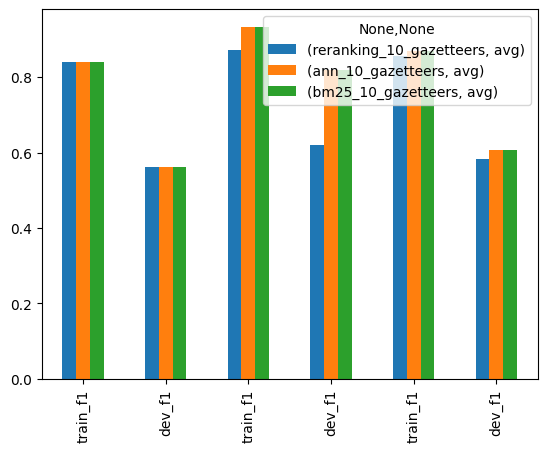

In [2]:
idx = pd.IndexSlice
df.reset_index(level=0).loc[:, idx[:, "avg"]].plot(kind="bar")

In [ ]:
import seaborn as sns

fg = sns.catplot()

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(
    *os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)
thesis_path, os.getcwd()

('/Users/robinloebbert/Masterarbeit/thesis',
 '/Users/robinloebbert/Masterarbeit/thesis/evaluations')

In [2]:
from pipelines.evaluation import factors

denoms = factors(40)

In [6]:
denoms[denoms.index(2)+1]

4

In [3]:
factors(50)

[1, 2, 5, 10, 25, 50]

In [3]:
dataset_files={
                   "train":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_train.json",
                   "dev":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_dev.json",
                   "test":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_test.json",
                   "types":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_types.json"
               }

In [8]:
import json
from collections import Counter
def entity_count_file(dataset_file):
    with open(dataset_file, "r", encoding="utf-8") as file:
        dataset = json.load(file)
    entities = []
    for item in dataset:
        for entity in item["entities"]:
            if entity["end"] - entity["start"] == 0:
                entity["end"] +=1
            entities.append((" ".join(item["tokens"][entity["start"]:entity["end"]]) , entity["type"]))
    return Counter(entities)

train_entities = entity_count_file(dataset_files["train"])

In [6]:
dev_entities = entity_count_file(dataset_files["dev"])
test_entities = entity_count_file(dataset_files["test"])

In [54]:
from typing import Iterable

def calc_set_intersection(first: Iterable, second: Iterable):
    return set(first).intersection(set(second))

In [55]:
train_dev_overlap = calc_set_intersection(train_entities, dev_entities)
len(train_dev_overlap)

0

In [56]:
train_test_overlap = calc_set_intersection(train_entities, test_entities)
len(train_test_overlap)

0

In [61]:

dev_test_overlap = calc_set_intersection(dev_entities, test_entities)

def overlap_metrics(first: Counter, second: Counter):
    overlap = calc_set_intersection(first, second)
    total_count = len(overlap)
    if total_count == 0:
        return total_count, 0.0, 0.0
    rel_first = sum([first[item] for item in overlap]) / sum([value for value in first.values()])
    rel_second = sum([second[item] for item in overlap]) / sum([value for value in second.values()])
    return total_count, rel_first, rel_second

(
    overlap_metrics(train_entities, dev_entities),
    overlap_metrics(train_entities, test_entities),
    overlap_metrics(dev_entities, test_entities)
 )

((0, 0.0, 0.0), (0, 0.0, 0.0), (33, 0.061004784688995214, 0.06672845227062095))

In [50]:
import pandas as pd
def plot_entity_count(entity_count: Counter):
    entities_df = pd.DataFrame.from_records([ {"entity": key[0], "type": key[1], "count": count} for key, count in entity_count.items()])
    # indexed_df = entities_df.set_index(["entity", "type"])
    entities_df.sort_values(by=["count"], ascending=False, inplace=True)
    entities_df.reset_index(inplace=True)
    return entities_df, entities_df.plot(y="count", ylabel="Occurances", xlabel="Entities", use_index=True)

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

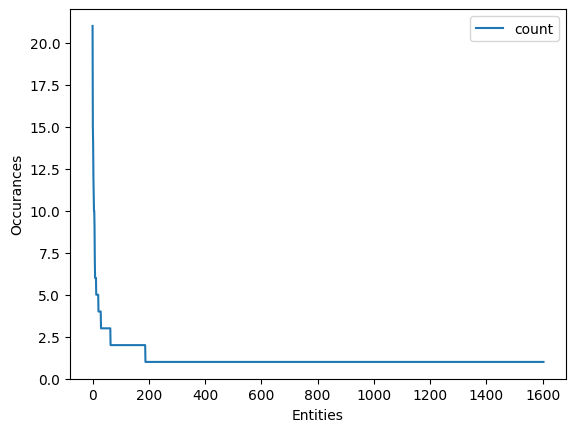

In [51]:
plot_entity_count(train_entities)[1]

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

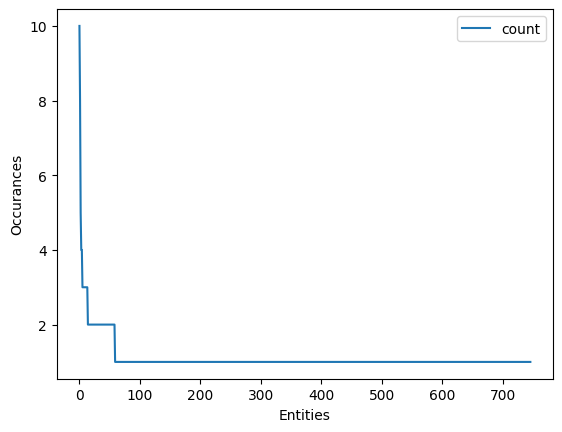

In [52]:
plot_entity_count(dev_entities)[1]

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

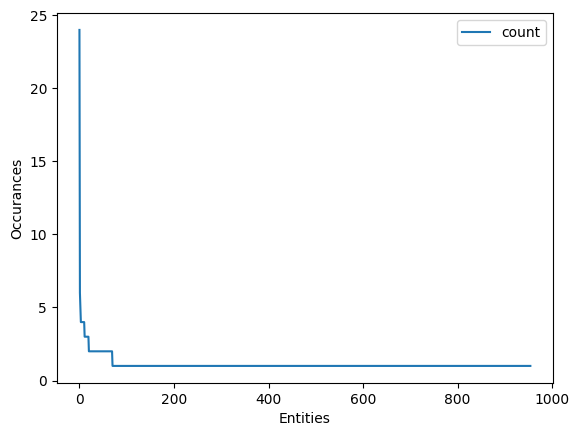

In [53]:
plot_entity_count(test_entities)[1]

In [63]:
from summary import create_database_stats

_, sims = create_database_stats("")

In [104]:
sims

,experiment_name,db_name,dataset_name,entry_name,result_idx,avg,std
0,bm25_10_sentences,gold,train,wnut_train_0,0,0.085733,0.0
1,bm25_10_sentences,gold,train,wnut_train_0,1,0.085733,0.0
2,bm25_10_sentences,gold,train,wnut_train_0,2,0.081378,0.0
3,bm25_10_sentences,gold,train,wnut_train_0,3,0.125783,0.0
4,bm25_10_sentences,gold,train,wnut_train_0,4,0.107386,0.0
...,...,...,...,...,...,...,...
433891,bm25_10_gazetteers,error,test,wnut_test_1270,8,0.132620,0.0
433892,bm25_10_gazetteers,error,test,wnut_test_1272,3,0.114649,0.0
433893,bm25_10_gazetteers,error,test,wnut_test_1272,4,0.141852,0.0
433894,bm25_10_gazetteers,error,test,wnut_test_1277,4,0.096708,0.0


In [100]:
lines = sims[sims["dataset_name"] == "train"].pivot_table(values=["avg"], index="result_idx", columns=["experiment_name", "db_name"], aggfunc="mean")
lines

avg                                       \
experiment_name ann_10_gazetteers           ann_10_sentences             
db_name                     error      gold            error      gold   
result_idx                                                               
0                        0.398169  0.434819         0.765455  1.000000   
1                        0.343780  0.375130         0.492573  0.539358   
2                        0.319566  0.350463         0.462556  0.497669   
3                        0.302481  0.333353         0.446702  0.479021   
4                        0.290743  0.322097         0.435610  0.466074   
5                        0.281509  0.312650         0.427031  0.456561   
6                        0.273916  0.304255         0.419551  0.449356   
7                        0.267593  0.296954         0.413262  0.442874   
8                        0.262290  0.290777         0.407824  0.437297   
9                        0.257650  0.285517         0.403038  0.432381   

                                                                          
experiment_name bm25_10_gazetteers           bm25_10_sentences            
db_name                      error      gold             error      gold  
result_idx                                                                
0                         0.112585  0.114163          0.146358  0.166647  
1                         0.107966  0.108991          0.124769  0.126590  
2                         0.104288  0.104346          0.123915  0.123509  
3                         0.102287  0.103011          0.122487  0.124879  
4                         0.099635  0.101059          0.122987  0.123004  
5                         0.097828  0.100030          0.122055  0.123487  
6                         0.097484  0.097394          0.122373  0.122462  
7                         0.097316  0.097271          0.121683  0.121162  
8                         0.097969  0.096111          0.120919  0.121827  
9                         0.097025  0.095253          0.120540  0.122382

<AxesSubplot: xlabel='result_idx'>

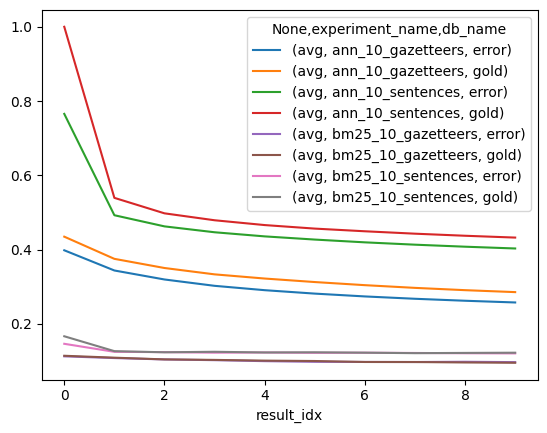

In [102]:
lines.plot.line()

In [66]:
experiments = sims["experiment_name"].unique().tolist()
dbs = sims["db_name"].unique().tolist()
dataset_parts = sims["dataset_name"].unique().tolist()

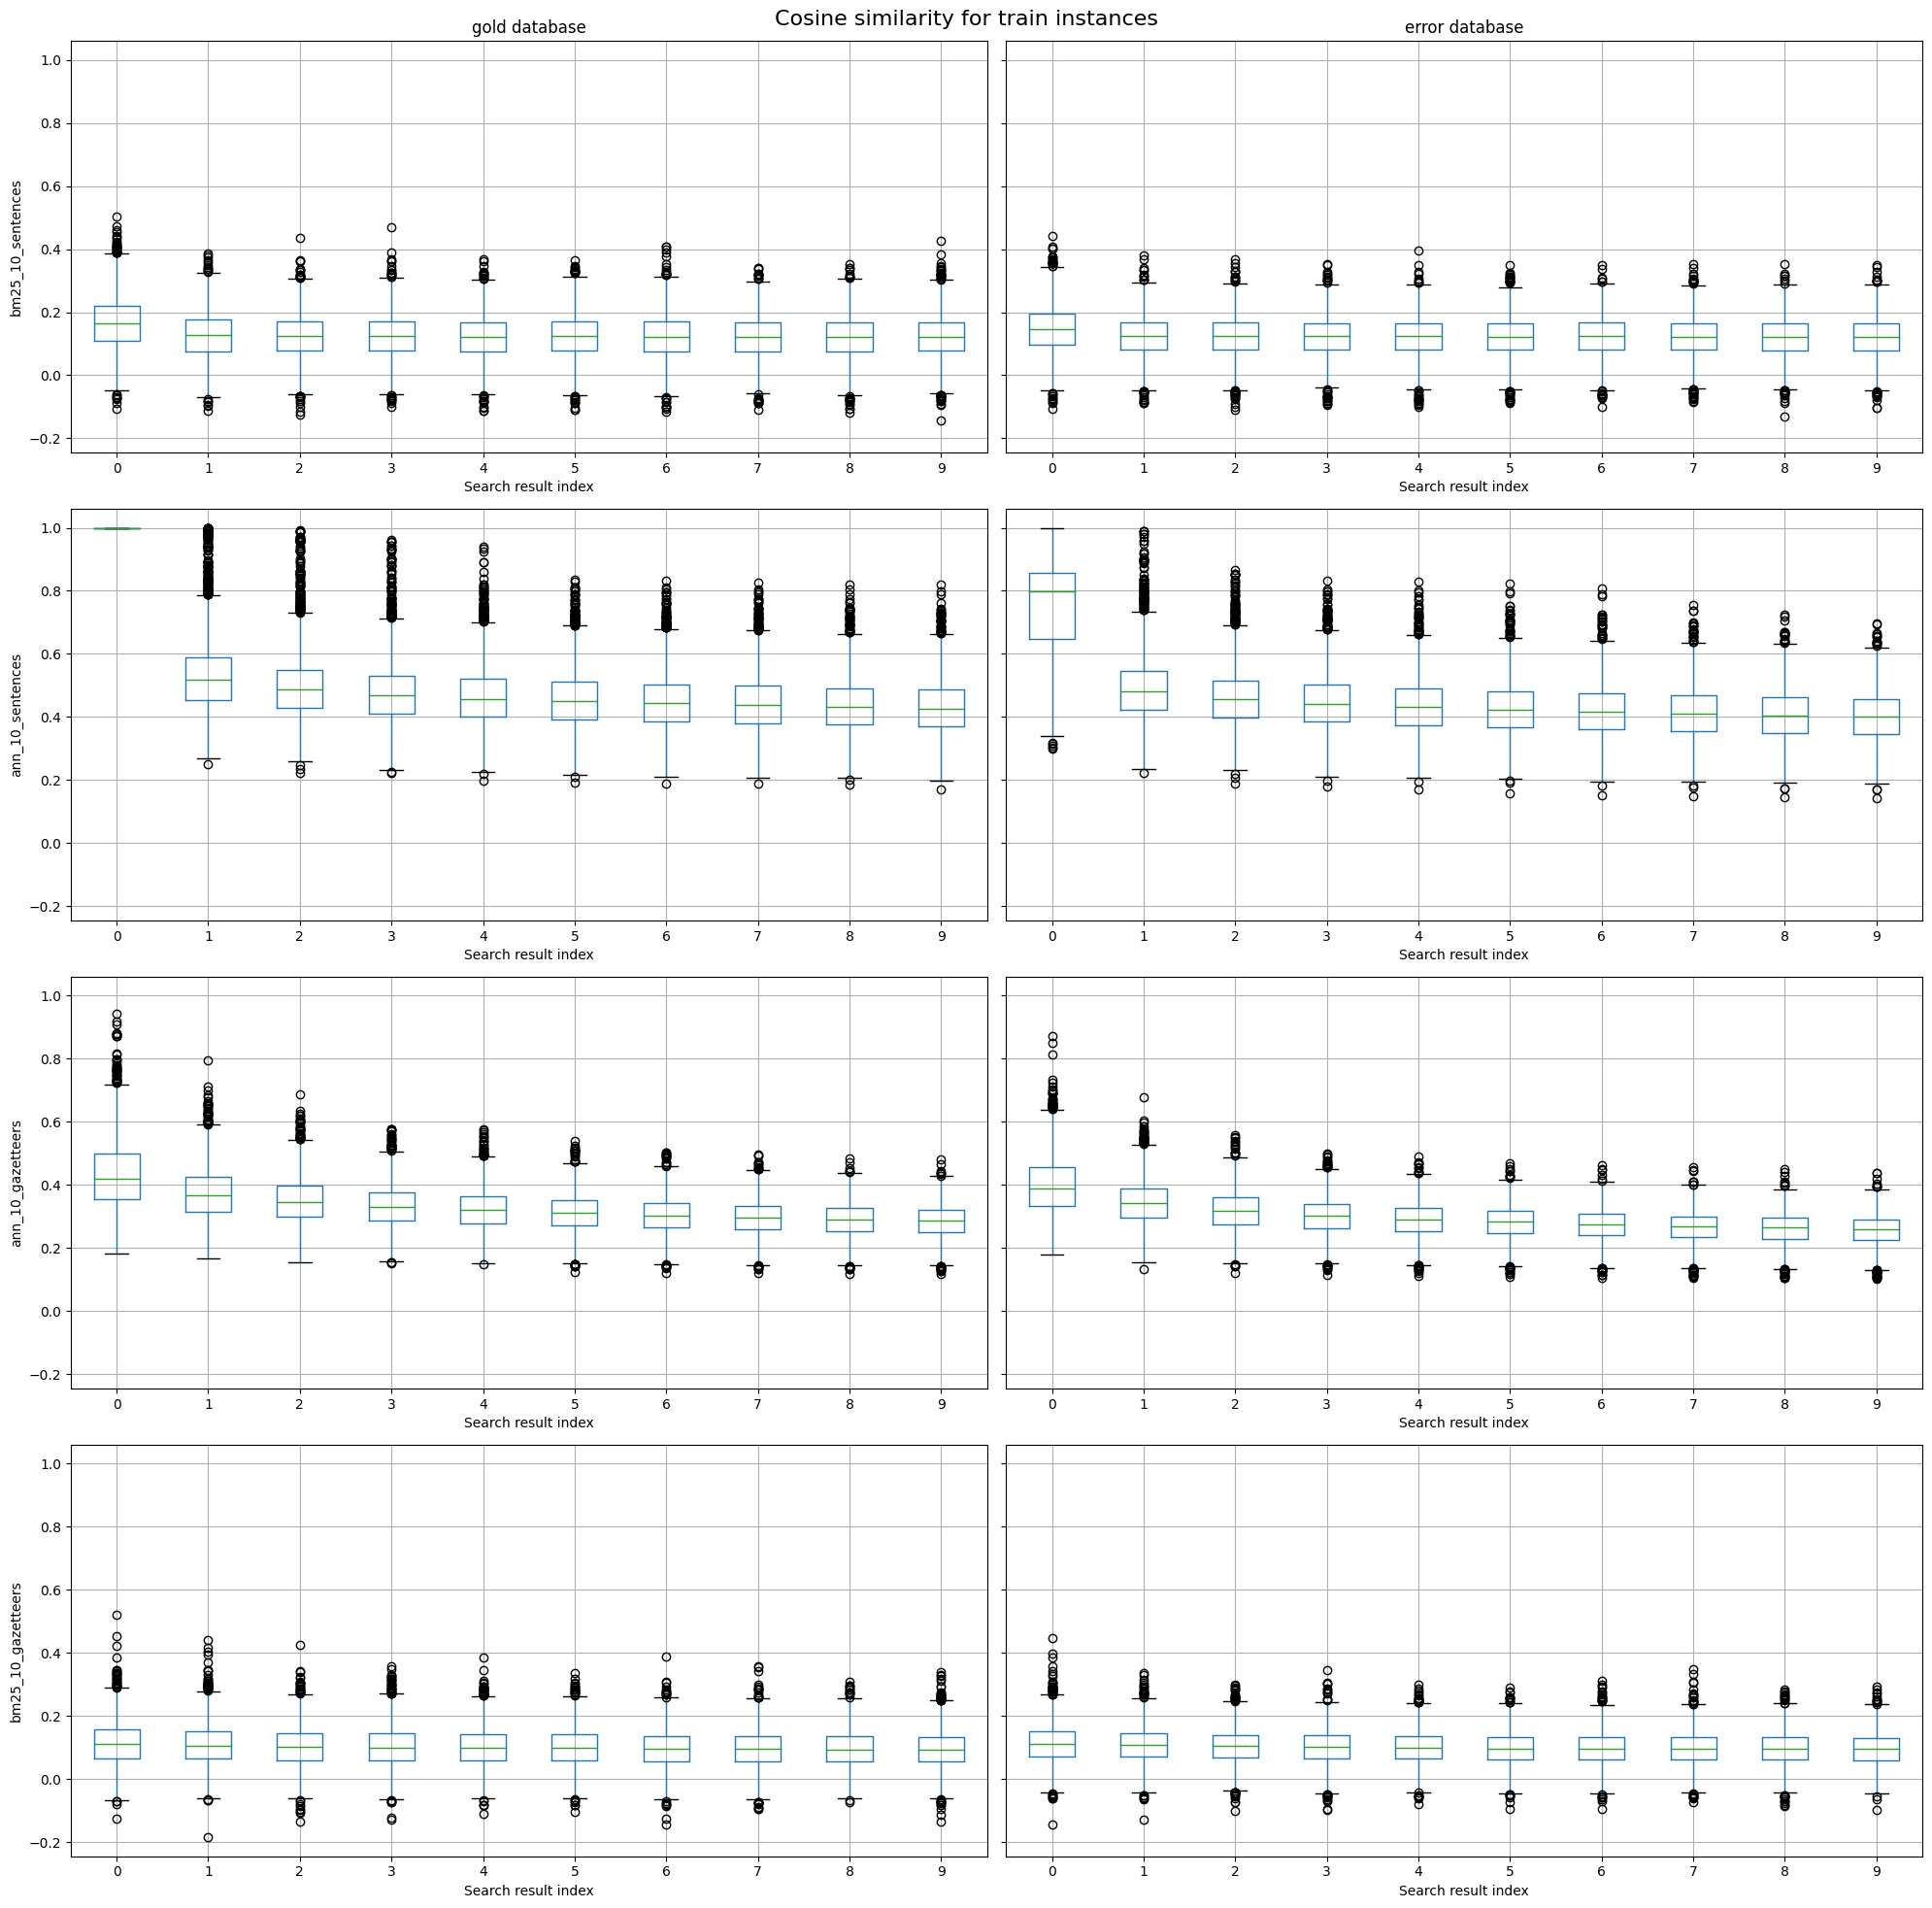

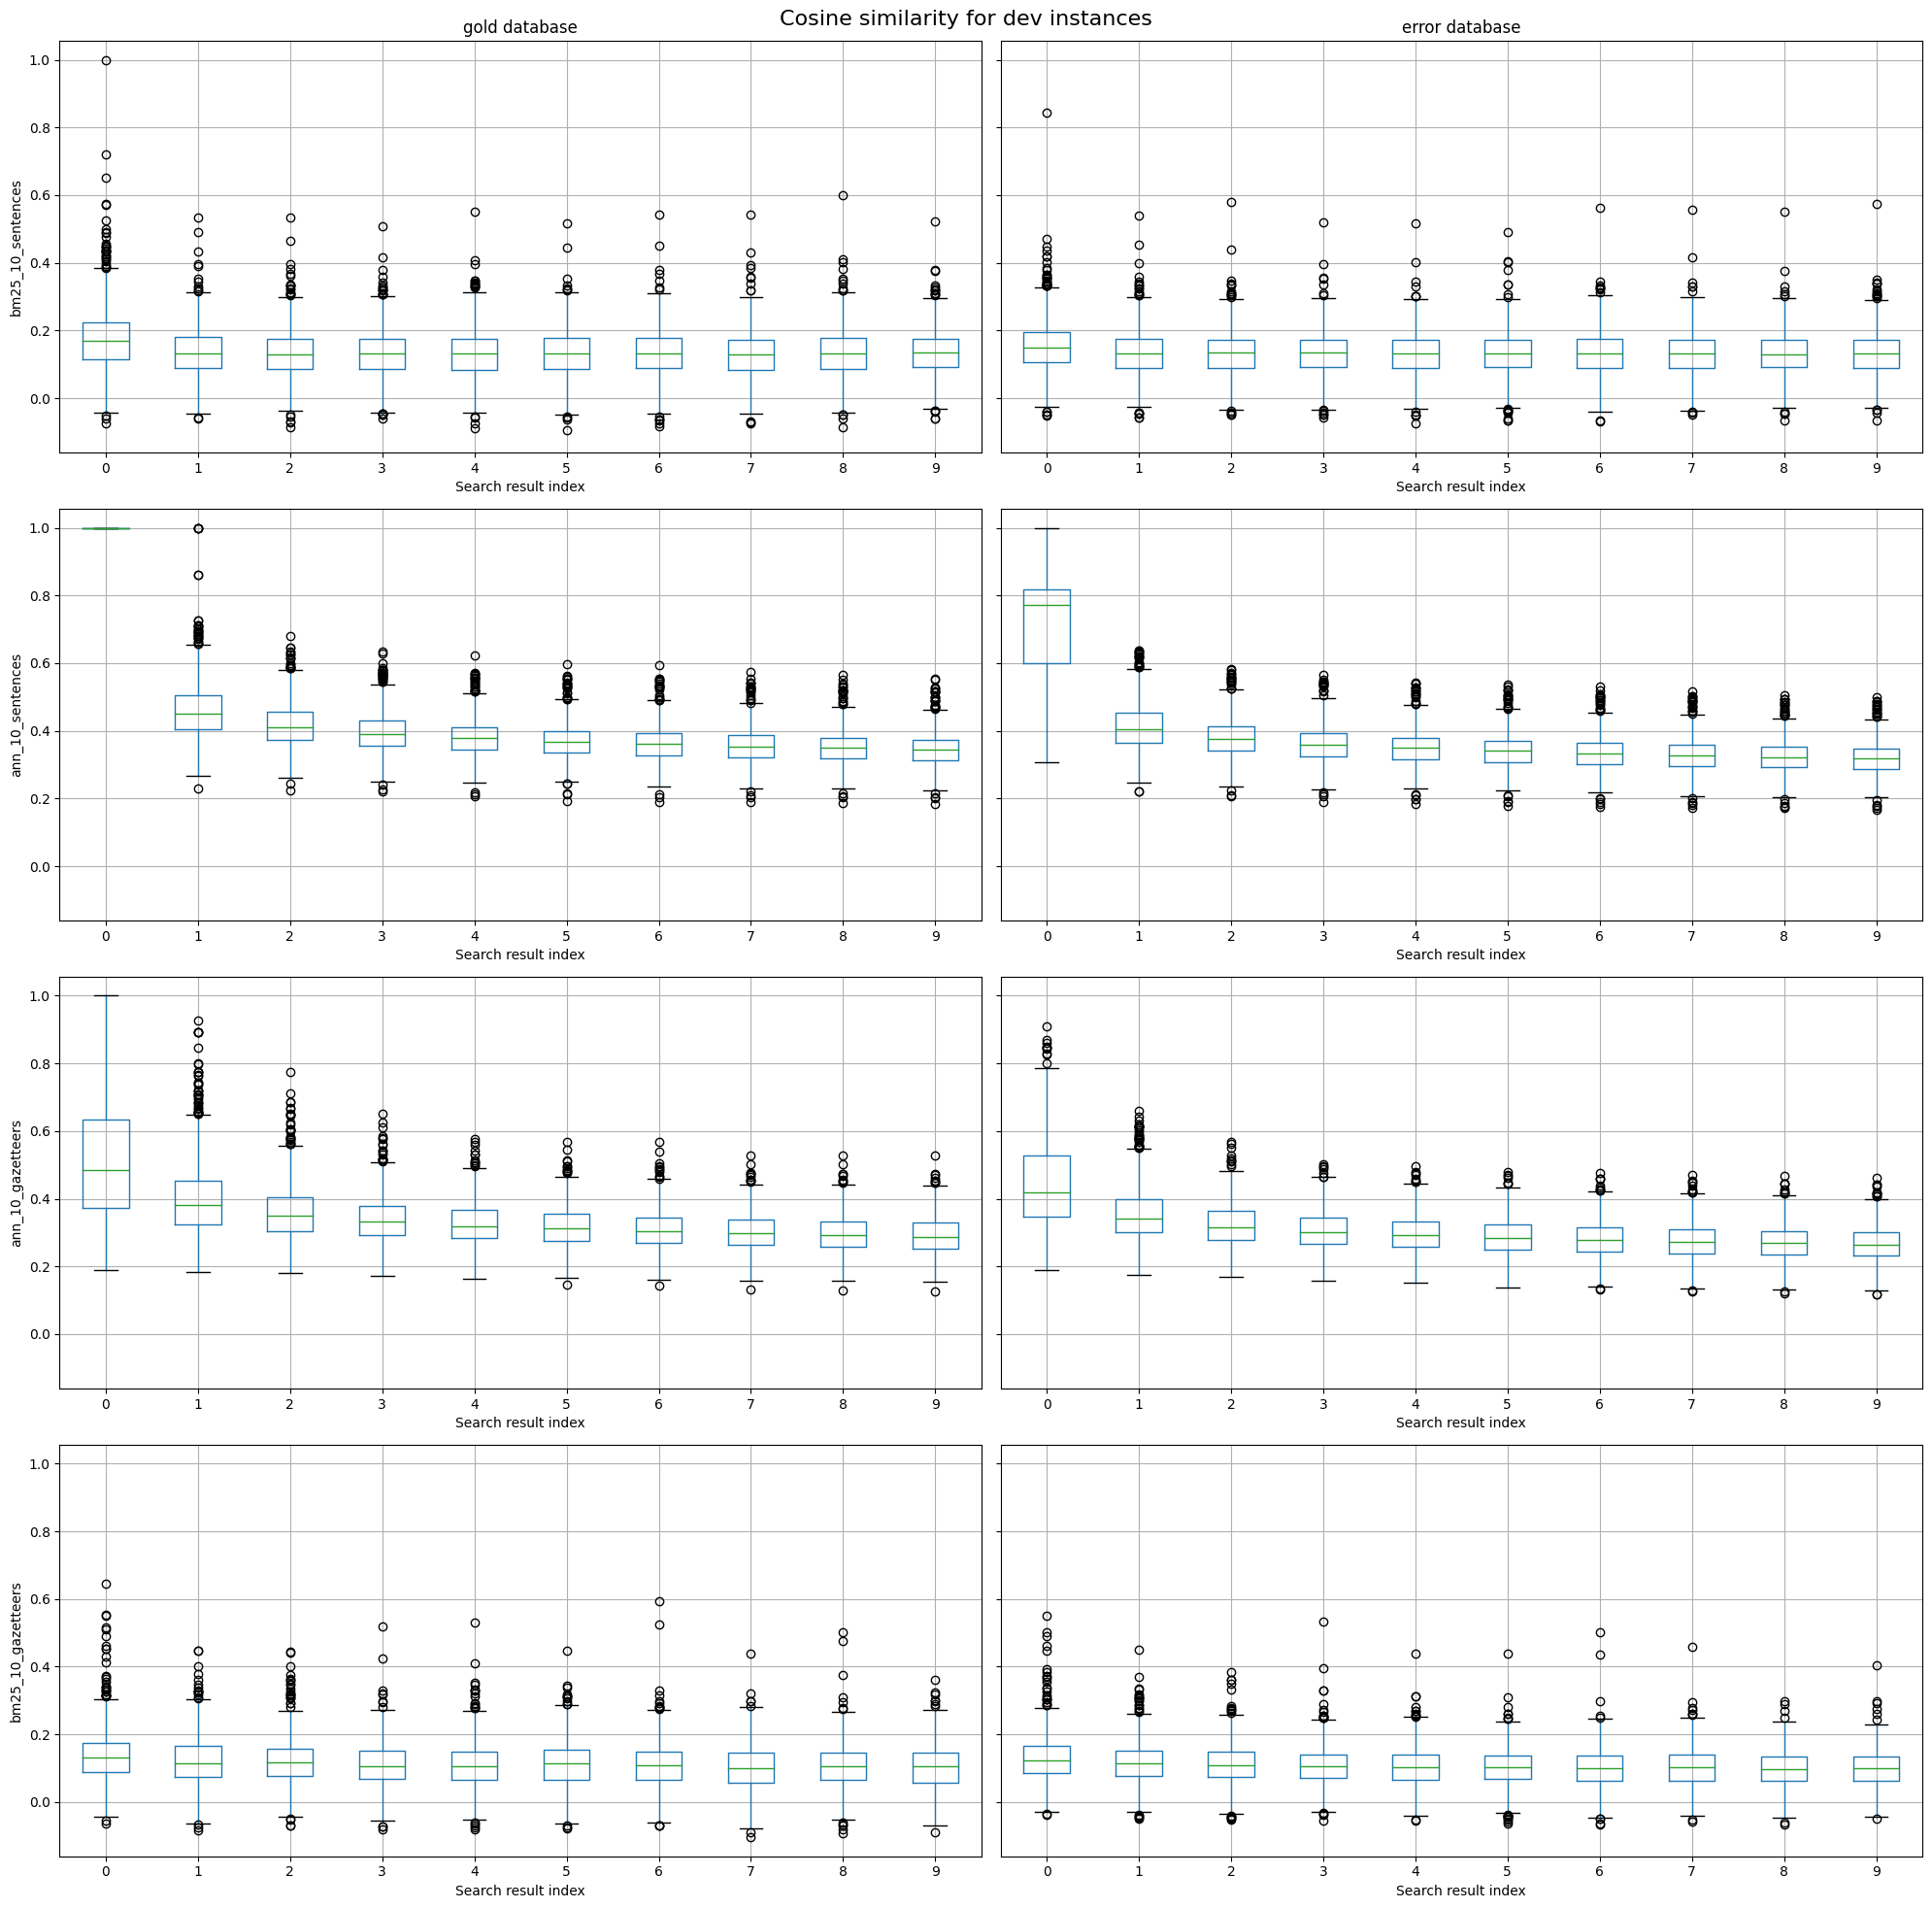

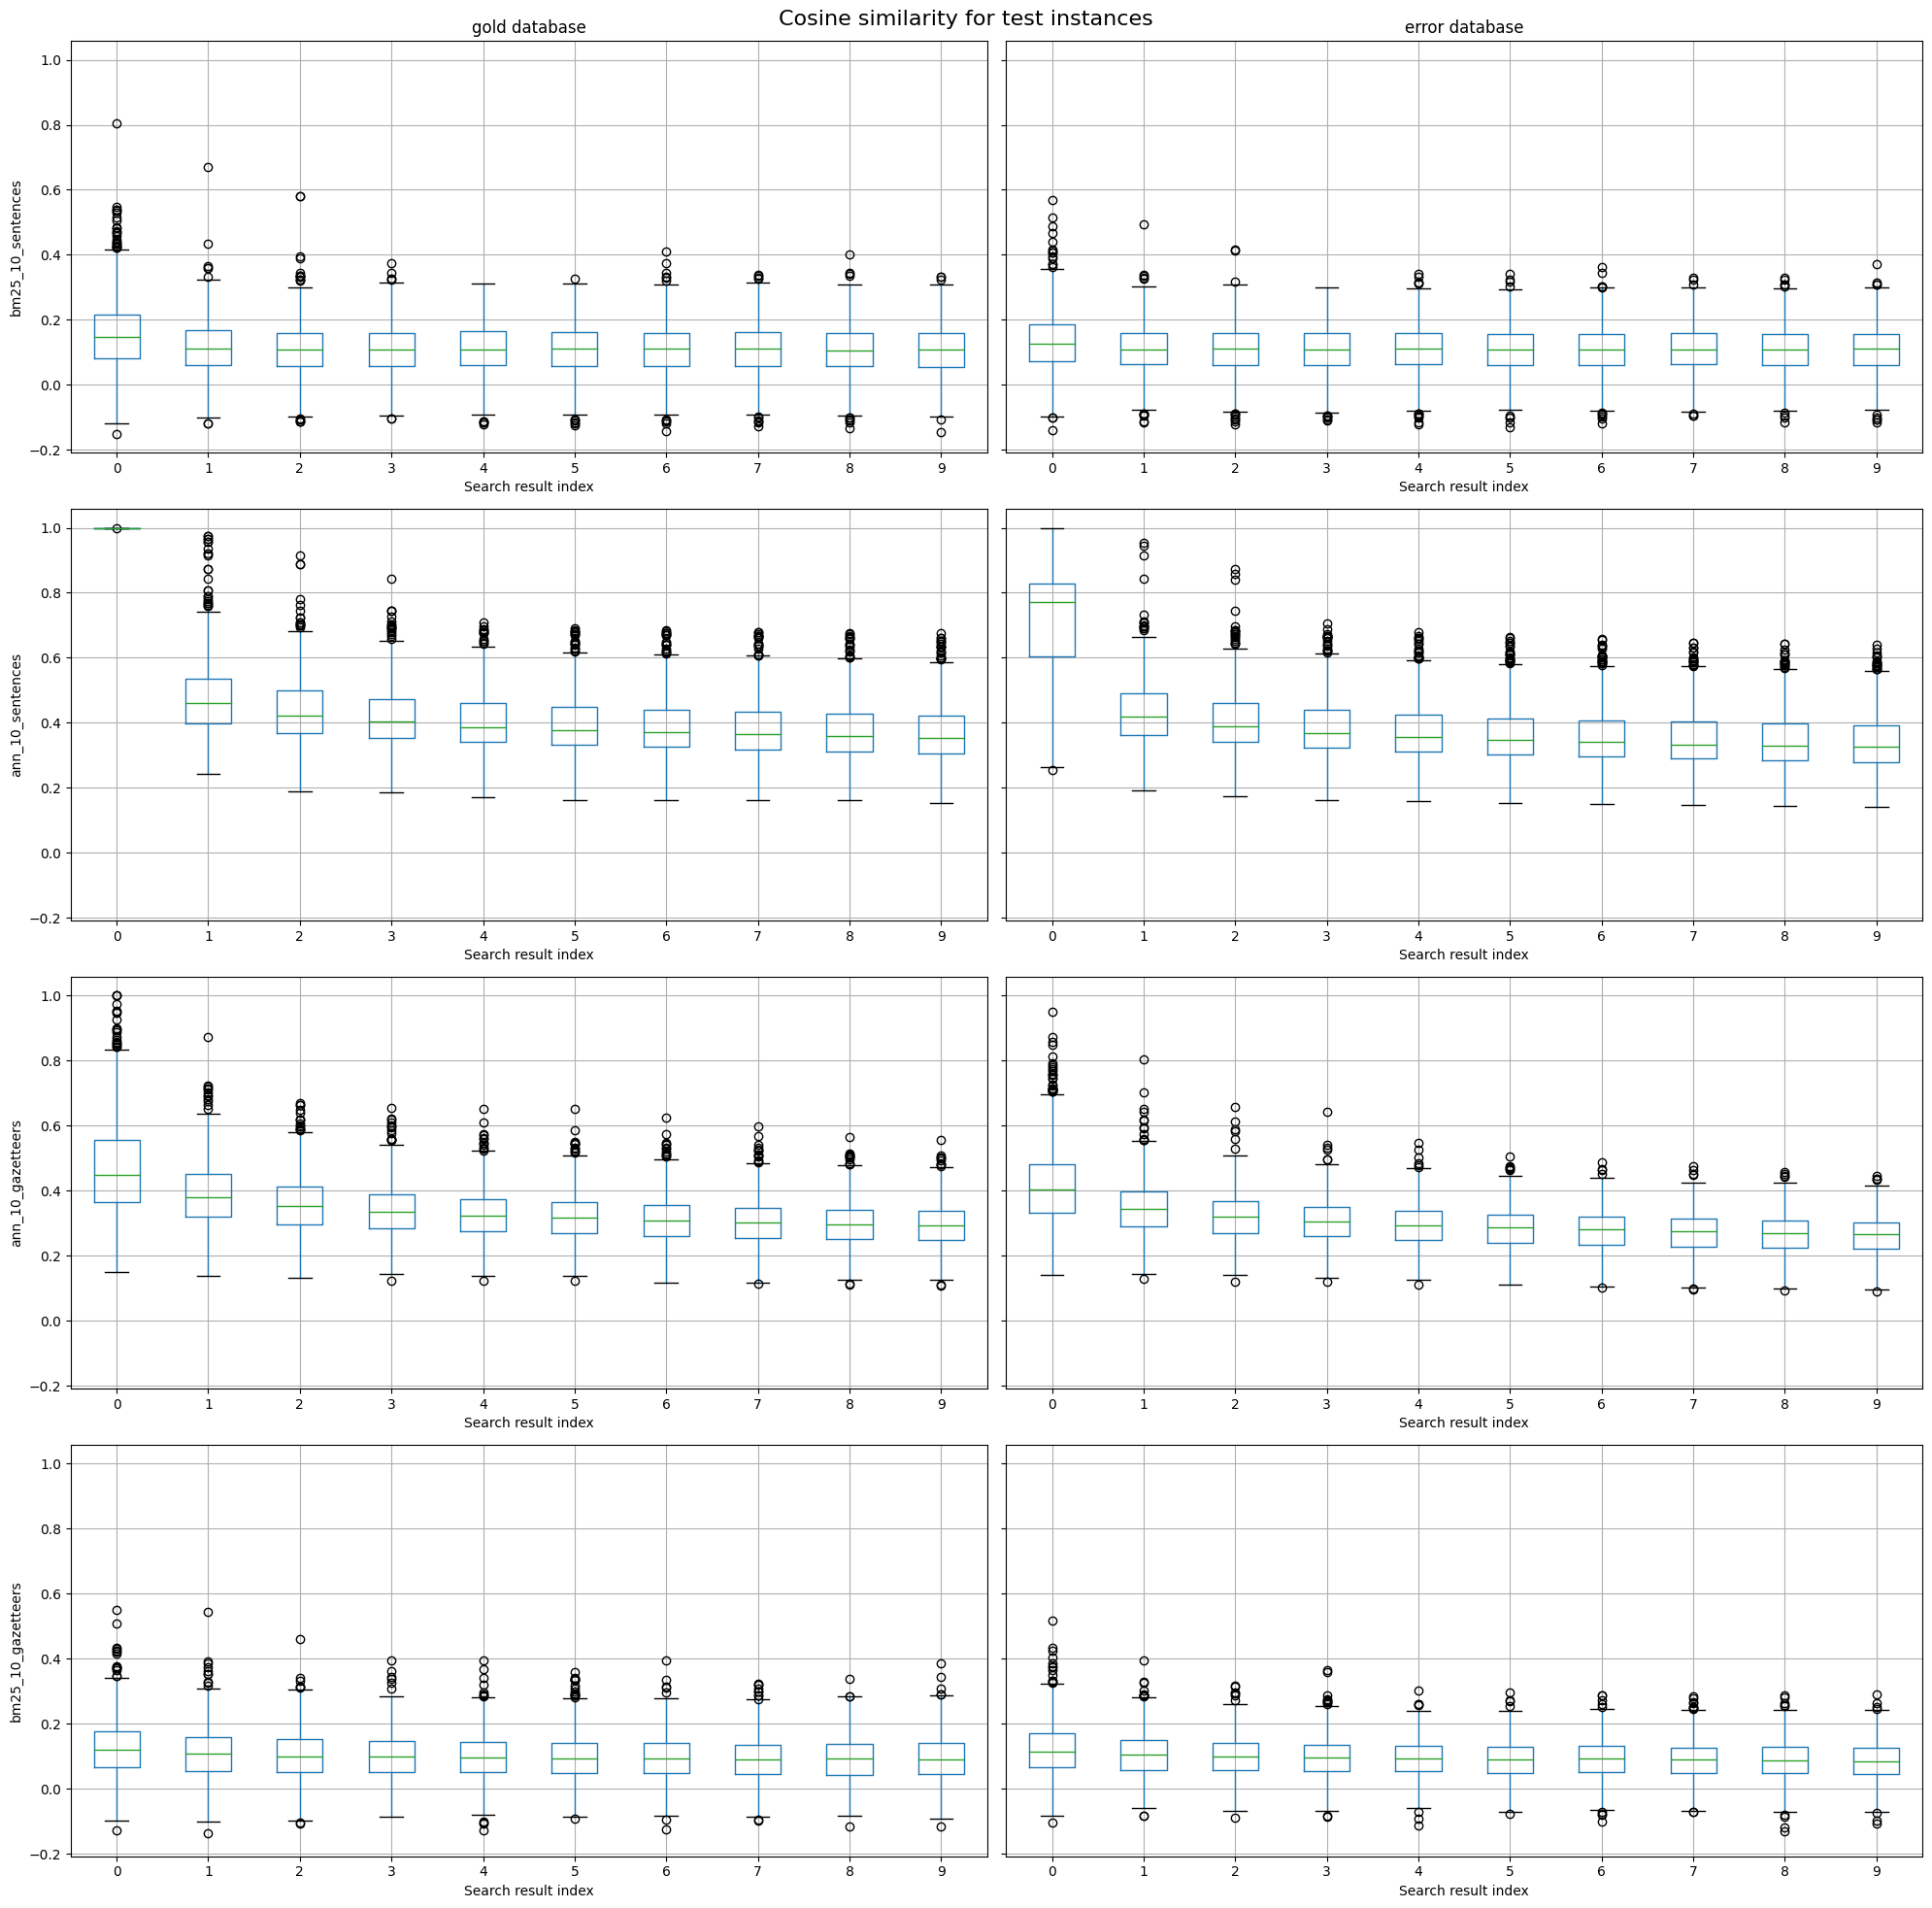

In [73]:
import matplotlib.pyplot as plt
for part in dataset_parts:
    fig, axs = plt.subplots(len(experiments), len(dbs), sharey=True, figsize=(20, 20))
    for row_idx, experiment in enumerate(experiments):
        for column_idx, db in enumerate(dbs):
            sims[(sims["experiment_name"]==experiment) & (sims["db_name"] == db) & (sims["dataset_name"] == part)].boxplot(column=["avg"], by="result_idx", ax=axs[row_idx, column_idx])
            axs[row_idx, column_idx].set_title(None)
            axs[row_idx, column_idx].set_xlabel("Search result index")
            
    for ax, col in zip(axs[0], dbs):
        ax.set_title(col+" database")

    for ax, row in zip(axs[:, 0], experiments):
        ax.set_ylabel(row)

    fig.suptitle(f"Cosine similarity for {part} instances", fontsize=16)
    fig.tight_layout()
    fig.savefig(f"{part}-database-similarities.png")